In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib as plt
import statistics 
import plotly.express as px
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go
import plotly.express as px

# Avaliação de Modelos de Regressão (Métricas de Performance)

# Regressão Linear Univariada

In [2]:
# Usaremos o dataset no qual mediremos o comprimento de um cateter (em cm) de acordo com a altura (em metros) do paciente
df = pd.DataFrame(data=[[1.087, 37], [1.613, 50], [0.953, 34], [1.003, 36], [1.156,43], [0.978, 28], [1.092, 37], [0.572, 20], [0.940, 34], [0.597, 30], [0.838, 38], [1.473, 47]], columns=['Altura','Comprimento'])

In [3]:
df

Altura  Comprimento
0    1.087           37
1    1.613           50
2    0.953           34
3    1.003           36
4    1.156           43
5    0.978           28
6    1.092           37
7    0.572           20
8    0.940           34
9    0.597           30
10   0.838           38
11   1.473           47

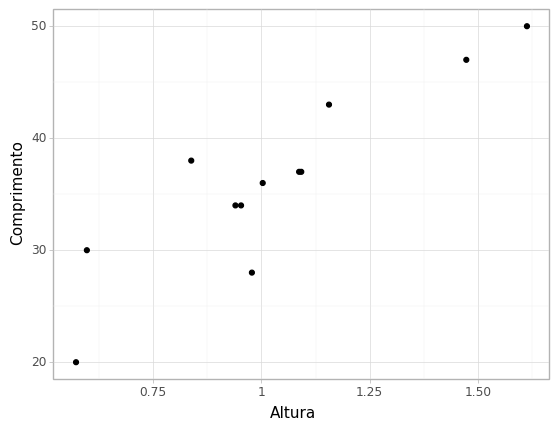

<ggplot: (135058341840)>

In [4]:
(ggplot(df,aes('Altura','Comprimento'))
 + geom_point()
 + theme_light()
)

## Gerando mais instâncias para o dataset do cateter

In [5]:
import random
import math


add_instances_into_dataset = 100

random.seed(1845)

size_df = len(df)

for i in range(add_instances_into_dataset):
    rand_altura = random.randrange(500, 2200)
    rand_altura /= 1000

    rand_comprimento = rand_altura*25 + random.randrange(10, 50)
    rand_comprimento = math.floor(rand_comprimento)

    new_row = {'Altura': rand_altura, 'Comprimento': rand_comprimento}
    df = df.append(new_row, ignore_index=True)

In [6]:
df.shape

(112, 2)

In [7]:
df

Altura  Comprimento
0     1.087         37.0
1     1.613         50.0
2     0.953         34.0
3     1.003         36.0
4     1.156         43.0
..      ...          ...
107   0.672         55.0
108   0.561         39.0
109   2.015         74.0
110   1.923         63.0
111   1.744         57.0

[112 rows x 2 columns]

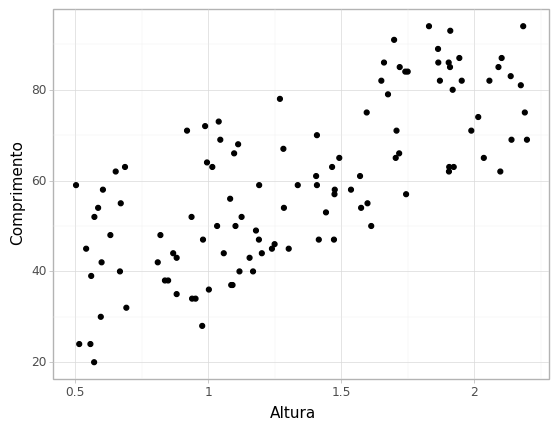

<ggplot: (135058439873)>

In [8]:
(ggplot(df,aes('Altura','Comprimento'))
 + geom_point()
 + theme_light()
)

In [9]:
X = df[['Altura']]
y = df[['Comprimento']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (75, 1) y: (75, 1)
TESTE:
X: (37, 1) y: (37, 1)


In [12]:
regr = linear_model.LinearRegression()
regr

LinearRegression()

In [13]:
regr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = regr.predict(X_test)
y_pred.shape

(37, 1)

In [15]:
print('Coefficient(s): \n', regr.coef_)
print('Intercept(s): \n', regr.intercept_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_pred, y_test))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient(s): 
 [[25.27840935]]
Intercept(s): 
 [25.84807003]
Mean squared error: 136.51
Coefficient of determination: 0.58


In [16]:
new_df = pd.concat([X_test, y_test], sort=False, axis=1)
new_df

Altura  Comprimento
40    1.944         87.0
65    1.409         59.0
4     1.156         43.0
47    1.741         84.0
42    1.830         94.0
69    0.882         35.0
26    1.750         84.0
11    1.473         47.0
10    0.838         38.0
44    1.906         63.0
73    0.516         24.0
55    1.596         75.0
68    2.036         65.0
97    0.542         45.0
0     1.087         37.0
18    1.118         40.0
53    1.016         63.0
80    0.811         42.0
103   1.098         66.0
91    0.850         38.0
36    1.705         65.0
12    0.688         63.0
31    0.587         54.0
66    1.476         58.0
90    1.180         49.0
62    0.600         42.0
22    1.270         78.0
85    1.126         52.0
81    1.466         63.0
77    1.708         71.0
15    1.989         71.0
30    1.406         61.0
45    1.909         85.0
9     0.597         30.0
33    1.083         56.0
56    1.910         93.0
64    1.416         47.0

In [17]:
new_df.shape

(37, 2)

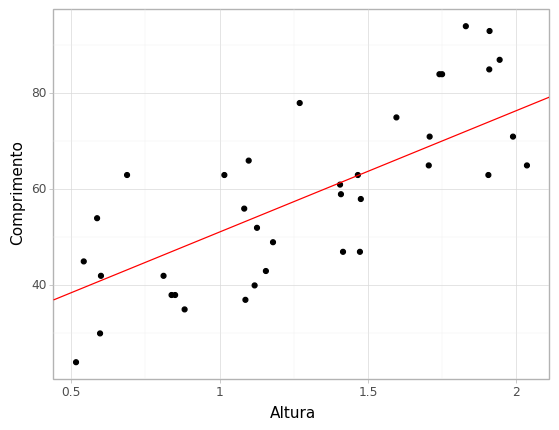

<ggplot: (135058534220)>

In [18]:
(ggplot(new_df,aes('Altura','Comprimento'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept=regr.intercept_[0] , slope=regr.coef_[0][0], color='red'))

# Regressão Linear Multivariada

### LinearRegression()

In [19]:
RLM_df = pd.DataFrame(data=[[1.087, 18.141, 37], [1.613, 42.404, 50], [0.953, 16.1, 34], [1.003, 13.605, 36], [1.156, 23.583, 43], [0.978, 7.71, 28], [1.092, 17.46, 37], [0.572, 3.855, 20], [0.940, 14.966, 34], [0.597, 4.308, 30], [0.838, 9.524, 38], [1.473, 35.828, 47]], columns=['Altura', 'Peso', 'Comprimento'])

In [20]:
RLM_df 

Altura    Peso  Comprimento
0    1.087  18.141           37
1    1.613  42.404           50
2    0.953  16.100           34
3    1.003  13.605           36
4    1.156  23.583           43
5    0.978   7.710           28
6    1.092  17.460           37
7    0.572   3.855           20
8    0.940  14.966           34
9    0.597   4.308           30
10   0.838   9.524           38
11   1.473  35.828           47

In [21]:
X = RLM_df[['Altura','Peso']]
y = RLM_df[['Comprimento']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (8, 2) y: (8, 1)
TESTE:
X: (4, 2) y: (4, 1)


In [24]:
regr_mult = linear_model.LinearRegression()
regr_mult

LinearRegression()

In [25]:
regr_mult.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = regr_mult.predict(X_test)
y_pred.shape

(4, 1)

In [27]:
print('Coefficient(s): \n', regr_mult.coef_)
print('Intercept(s): \n', regr_mult.intercept_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_pred, y_test))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient(s): 
 [[17.12554182  0.30696289]]
Intercept(s): 
 [11.79110664]
Mean squared error: 31.89
Coefficient of determination: -2.29


In [28]:
new_df = pd.concat([X_test, y_test], sort=False, axis=1)
new_df

Altura    Peso  Comprimento
10   0.838   9.524           38
9    0.597   4.308           30
0    1.087  18.141           37
8    0.940  14.966           34

In [29]:
mesh_size = .02
margin = 0


x_min, x_max = X_train.Altura.min() - margin, X_train.Altura.max() + margin
y_min, y_max = X_train.Peso.min() - margin, X_train.Peso.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = regr_mult.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

fig = px.scatter_3d(new_df, x='Altura', y='Peso', z='Comprimento')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

### SGDRegression()

In [30]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
X = RLM_df[['Altura','Peso']]
y = RLM_df[['Comprimento']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (8, 2) y: (8, 1)
TESTE:
X: (4, 2) y: (4, 1)


In [34]:
reg = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [35]:
reg.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])>

In [36]:
y_pred = reg.predict(X_test)
y_pred.shape

(4,)

In [37]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_pred, y_test))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 33.56
Coefficient of determination: -2.46


# Regressão Polinomial

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [39]:
df

Altura  Comprimento
0     1.087         37.0
1     1.613         50.0
2     0.953         34.0
3     1.003         36.0
4     1.156         43.0
..      ...          ...
107   0.672         55.0
108   0.561         39.0
109   2.015         74.0
110   1.923         63.0
111   1.744         57.0

[112 rows x 2 columns]

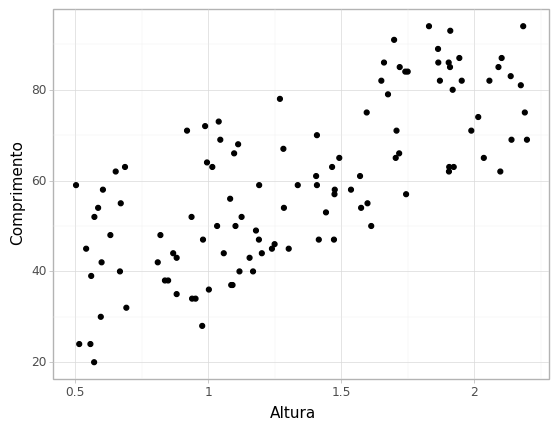

<ggplot: (135058536433)>

In [40]:
(ggplot(df,aes('Altura','Comprimento'))
 + geom_point()
 + theme_light()
)

In [41]:
X = df[['Altura']]
y = df[['Comprimento']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (75, 1) y: (75, 1)
TESTE:
X: (37, 1) y: (37, 1)


In [44]:
for count, degree in enumerate([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(0))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("For Degree", degree, "the results are:")
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_pred, y_test))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))
    print("-----------------------------------------------------")
   

For Degree 3 the results are:
Mean squared error: 131.44
Coefficient of determination: 0.60
-----------------------------------------------------
For Degree 4 the results are:
Mean squared error: 125.02
Coefficient of determination: 0.62
-----------------------------------------------------
For Degree 5 the results are:
Mean squared error: 125.14
Coefficient of determination: 0.62
-----------------------------------------------------
For Degree 6 the results are:
Mean squared error: 127.19
Coefficient of determination: 0.61
-----------------------------------------------------
For Degree 7 the results are:
Mean squared error: 126.97
Coefficient of determination: 0.61
-----------------------------------------------------
For Degree 8 the results are:
Mean squared error: 126.98
Coefficient of determination: 0.61
-----------------------------------------------------
For Degree 9 the results are:
Mean squared error: 123.49
Coefficient of determination: 0.62
--------------------------------

### Treinamento

In [45]:
xp = np.linspace(X_train.min(), X_train.max(), 100)

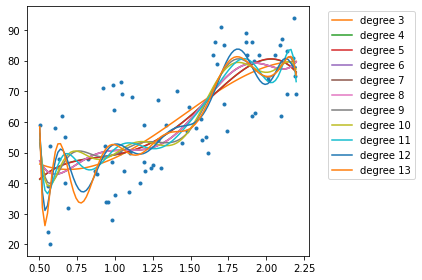

In [46]:
_ = plt.plot(X_train, y_train, '.')
for count, degree in enumerate([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(0))
    model.fit(X_train, y_train)
    _ = plt.plot(xp, model.predict(xp), '-',label="degree "+str(degree))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

### Teste

In [47]:
xp = np.linspace(X_test.min(), X_test.max(), 100)

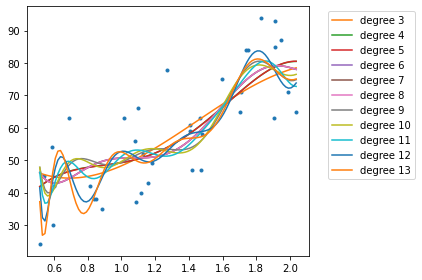

In [48]:
_ = plt.plot(X_test, y_test, '.')
for count, degree in enumerate([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(0))
    model.fit(X_train, y_train)
    _ = plt.plot(xp, model.predict(xp), '-',label="degree "+str(degree))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()